# Latar Belakang

Penelitian ini berfokus pada pengembangan model machine learning sebagai inti inovasi pembelajaran adaptif bernama **AdapTeach**. AdapTeach dirancang untuk mendukung pemerataan pendidikan di era Society 5.0 dengan menganalisis data akses internet di institusi pendidikan Indonesia yang bersumber dari portal Kemendikbudristek Tahun Ajaran 2022/2023. Analisis akan menyoroti hubungan antara akses internet dan kualitas pendidikan di Indonesia.

Pemodelan yang digunakan berupa algoritma K-Means untuk clustering sebagai metode pengelompokkan provinsi berdasarkan tingkat akses internet pada jenjang pendidikan di setiap provinsi. Selain itu, digunakan algoritma Decision Tree untuk klasifikasi yang bertujuan mengidentifikasi pola dan faktor utama yang memengaruhi ketersediaan akses tersebut. Dengan kombinasi tersebut, AdapTeach diharapkan mampu menjadi langkah inovatif dalam mendukung pemerataan pendidikan berkualitas di seluruh wilayah Indonesia, sejalan dengan visi Society 5.0 yang mengintegrasikan teknologi cerdas dalam kehidupan masyarakat.

# Dataset
## Dataset Awal
Data yang digunakan adalah data sekunder dari portal data Kemendikbudristek tentang "Proporsi sekolah dengan akses ke internet untuk tujuan pembelajaran" pada jenjang SD, SMP, SMA, SMK, dan SLB Tahun Ajaran 2022/2023. Dataset mencakup data dari 35 wilayah (34 provinsi di Indonesia dan 1 dari luar negeri). Variabel dalam data meliputi:
1. No: Penomoran data.
2. Kode Kemdagri: Kode administrasi dari Kementerian Dalam Negeri.
3. Kode BPS: Kode wilayah dari Badan Pusat Statistik.
4. Provinsi: Nama provinsi.
5. Tersedia: Jumlah sekolah dengan akses internet.
6. Tidak tersedia: Jumlah sekolah tanpa akses internet.
7. Persentase tersedia: Proporsi sekolah dengan akses internet di setiap provinsi.

## Penggabungan Data dan Dataset Baru
Penggabungan data dilakukan dengan mengintegrasikan lima dataset terpisah (SD, SMP, SMA, SMK, SLB) menjadi satu dataset tunggal menggunakan perangkat lunak SPSS. Prosesnya meliputi:
1. Mengimpor setiap dataset ke SPSS.
2. Kelima dataset tersebut digabungkan menggunakan fitur `Merge Files` dengan metode `Add Cases` untuk memastikan seluruh data jenjang pendidikan tersedia dalam satu dataset.
3. Agregasi Data berdasarkan provinsi menggunakan fitur Aggregate untuk menghitung total `Tersedia`, `Tidak tersedia`, dan `Persentase Tersedia` yang kemudian menghasilkan variabel baru berupa `Tersedia_Mean`, `Tidak Tersedia_Mean`, dan `Persentase_Baru`



## Baca Dataset

In [ ]:
import pandas as pd

# Baca setiap dataset
data = pd.read_csv('/content/proporsi-sd smp sma smk slb.csv')
data.head()

,No,Kode Kemdagri,Kode BPS,Provinsi,Tersedia_Mean,Tidak tersedia_Mean,Persentase_Baru
0,1,11.0,11.0,Aceh,976.6,145.4,87.04
1,2,12.0,12.0,Sumatera Utara,2470.2,442.0,84.82
2,3,13.0,13.0,Sumatera Barat,1020.2,145.2,87.54
3,4,14.0,14.0,Riau,1076.4,93.6,92.00
4,5,15.0,15.0,Jambi,637.0,83.8,88.37


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No                   35 non-null     int64  
 1   Kode Kemdagri        34 non-null     float64
 2   Kode BPS             34 non-null     float64
 3   Provinsi             35 non-null     object 
 4   Tersedia_Mean        35 non-null     float64
 5   Tidak tersedia_Mean  35 non-null     float64
 6   Persentase_Baru      35 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.0+ KB


## Eksplorasi Data

### Statistik Deskriptif
Mnghitung nilai rata-rata (mean), median, standar deviasi (std), nilai minimum (min), dan maksimum (max) dari variabel-variabel utama: Tersedia_Mean, Tidak tersedia_Mean, dan Persentase_Baru.

### Visualisasi Data
- Histogram: Untuk melihat distribusi variabel Persentase_Baru.
- Scatterplot: Untuk mengetahui hubungan antara variabel Tersedia_Mean dan Tidak tersedia_Mean.
- Boxplot: Untuk mengidentifikasi outlier pada variabel Tersedia_Mean dan Tidak tersedia_Mean.

### Identifikasi Outlier
Dengan menggunakan boxplot dan statistik deskriptif, kita dapat mengidentifikasi provinsi-provinsi yang memiliki nilai ekstrem, seperti Persentase_Baru yang jauh lebih rendah atau lebih tinggi dibandingkan rata-rata nasional.

In [ ]:
# Statistik Deskriptif
data.describe()

,No,Kode Kemdagri,Kode BPS,Tersedia_Mean,Tidak tersedia_Mean,Persentase_Baru
count,35.000000,34.000000,34.000000,35.000000,35.000000,35.000000
mean,18.000000,47.500000,47.558824,1126.365714,141.800000,83.549429
std,10.246951,26.397027,26.501219,1418.289497,116.146753,12.498995
min,1.000000,11.000000,11.000000,31.600000,4.600000,49.620000
25%,9.500000,19.500000,19.500000,362.600000,62.600000,75.490000
50%,18.000000,51.500000,51.500000,634.200000,114.400000,87.040000
75%,26.500000,71.750000,71.750000,1175.600000,189.900000,93.130000
max,35.000000,92.000000,94.000000,5856.200000,442.000000,99.350000


In [ ]:
# Histogram Persentase_Baru
plt.figure(figsize=(8, 6))
sns.histplot(df["Persentase_Baru"], bins=10, kde=True, color="blue")
plt.title("Distribusi Persentase Akses Internet")
plt.xlabel("Persentase_Baru")
plt.ylabel("Frekuensi")
plt.show()

In [ ]:
# Scatterplot
plt.scatter(df['Tersedia_Mean'], df['Tidak tersedia_Mean'])
plt.title("Scatterplot Tersedia dan Tidak Tersedia")
plt.xlabel("Tersedia_Mean")
plt.ylabel("Tidak Tersedia_Mean")
plt.show()

In [ ]:
# Boxplot Tersedia_Mean dan Tidak tersedia_Mean
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[["Tersedia_Mean", "Tidak tersedia_Mean"]])
plt.title("Boxplot Tersedia dan Tidak Tersedia")
plt.ylabel("Nilai")
plt.show()

In [ ]:
# Diagram Batang persentase akses internet tiap provinsi
plt.figure(figsize=(12, 8))
plt.bar(data['Provinsi'], data['Persentase_Baru'], color='skyblue', edgecolor='black')

plt.title('Persentase Akses Internet Tiap Provinsi', fontsize=16)
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Persentase Akses Internet (%)', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan nilai persentase di atas batang
for i, value in enumerate(data['Persentase_Baru']):
    plt.text(i, value + 0.5, f"{value:.2f}%", ha='center', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()

## Algoritma K-Means Clustering

### Data Training

In [ ]:
# Membuat DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
selected_columns = ['Provinsi', 'Tersedia_Mean', 'Tidak tersedia_Mean', 'Persentase_Baru']
df = data[selected_columns]
df.head()

,Provinsi,Tersedia_Mean,Tidak tersedia_Mean,Persentase_Baru
0,Aceh,976.6,145.4,87.04
1,Sumatera Utara,2470.2,442.0,84.82
2,Sumatera Barat,1020.2,145.2,87.54
3,Riau,1076.4,93.6,92.00
4,Jambi,637.0,83.8,88.37


In [ ]:
# Skalasi data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Persentase_Baru']])
data_scaled

array([[0.7524633 ],
       [0.70782224],
       [0.7625176 ],
       [0.85220189],
       [0.77920772],
       [0.85019103],
       [0.66117032],
       [0.80715866],
       [0.9089081 ],
       [0.89081038],
       [1.        ],
       [0.93344058],
       [0.97888598],
       [0.99638045],
       [0.95214156],
       [0.93525035],
       [0.96863061],
       [0.85903881],
       [0.6102956 ],
       [0.38427509],
       [0.47737784],
       [0.80353911],
       [0.79871305],
       [0.45686708],
       [0.53609491],
       [0.50573095],
       [0.68771365],
       [0.53468731],
       [0.70802333],
       [0.27126483],
       [0.30665594],
       [0.30102554],
       [0.        ],
       [0.31027549],
       [0.59079027]])

In [ ]:
# Elbow Method untuk menentukan jumlah cluster (K)
from sklearn.cluster import KMeans
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)
sse

[2.147791756794322,
 0.5756635108983963,
 0.3391932705734073,
 0.16622902961466832,
 0.08369928156990443,
 0.05085473150966696,
 0.04229672256460107,
 0.030319066095579165,
 0.01731257526386932,
 0.012789242888877207]

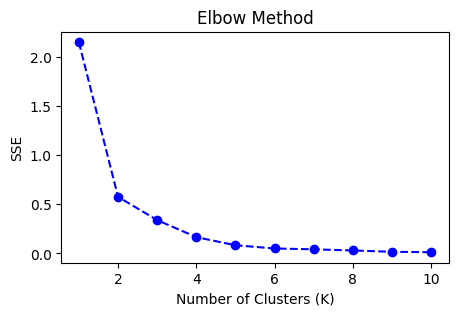

In [ ]:
# Visualisasi Elbow Method
plt.figure(figsize=(5, 3))
plt.plot(k_range, sse, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.show()

In [ ]:
# K-Means dengan K=3 sesuai dengan hasil Elbow Method
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)
data

,No,Kode Kemdagri,Kode BPS,Provinsi,Tersedia_Mean,Tidak tersedia_Mean,Persentase_Baru,Cluster
0,1,11.0,11.0,Aceh,976.6,145.4,87.04,2
1,2,12.0,12.0,Sumatera Utara,2470.2,442.0,84.82,2
2,3,13.0,13.0,Sumatera Barat,1020.2,145.2,87.54,2
3,4,14.0,14.0,Riau,1076.4,93.6,92.00,0
4,5,15.0,15.0,Jambi,637.0,83.8,88.37,2
5,6,16.0,16.0,Sumatera Selatan,1298.6,114.4,91.90,0
6,7,17.0,17.0,Bengkulu,348.8,74.0,82.50,2
7,8,18.0,18.0,Lampung,1294.0,147.6,89.76,2
8,9,19.0,19.0,Kep. Bangka Belitung,226.8,12.4,94.82,0
9,10,21.0,21.0,Kepulauan Riau,315.0,20.4,93.92,0


In [ ]:
data.to_csv("proporsi_hasil_k-means.csv", index=False)

In [ ]:
# Memberikan label pada cluster
data['Cluster'] = data['Cluster'].replace([0, 1, 2], ['Tinggi', 'Rendah', 'Menengah'])
data

,No,Kode Kemdagri,Kode BPS,Provinsi,Tersedia_Mean,Tidak tersedia_Mean,Persentase_Baru,Cluster
0,1,11.0,11.0,Aceh,976.6,145.4,87.04,Menengah
1,2,12.0,12.0,Sumatera Utara,2470.2,442.0,84.82,Menengah
2,3,13.0,13.0,Sumatera Barat,1020.2,145.2,87.54,Menengah
3,4,14.0,14.0,Riau,1076.4,93.6,92.00,Tinggi
4,5,15.0,15.0,Jambi,637.0,83.8,88.37,Menengah
5,6,16.0,16.0,Sumatera Selatan,1298.6,114.4,91.90,Tinggi
6,7,17.0,17.0,Bengkulu,348.8,74.0,82.50,Menengah
7,8,18.0,18.0,Lampung,1294.0,147.6,89.76,Menengah
8,9,19.0,19.0,Kep. Bangka Belitung,226.8,12.4,94.82,Tinggi
9,10,21.0,21.0,Kepulauan Riau,315.0,20.4,93.92,Tinggi


In [ ]:
data.to_csv("proporsi_hasil_kmeans.csv", index=False)

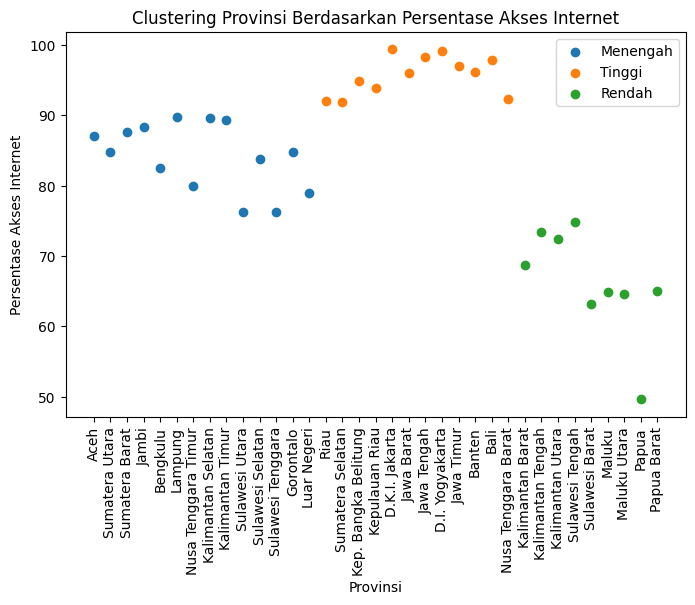

In [ ]:
# visualisasi hasil K-Means menggunakan Elbow Method
plt.figure(figsize=(8, 5))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Provinsi'], cluster_data['Persentase_Baru'], label=cluster)

plt.title('Clustering Provinsi Berdasarkan Persentase Akses Internet')
plt.xlabel('Provinsi')
plt.ylabel('Persentase Akses Internet')
plt.xticks(rotation=90)
plt.legend()